In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Input, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.utils import shuffle

In [50]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"  

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)


X = np.array(images).reshape(-1, 28*28)  
y = to_categorical(labels, num_classes=10)  

print(X.shape)  
print(y.shape)


(10160, 784)
(10160, 10)


In [51]:
X, y = shuffle(X, y, random_state=42)

In [ ]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))  
])  

In [53]:
model.compile(optimizer=RMSprop(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(X,y,epochs=10,batch_size=1000,validation_split=0.2)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1464 - loss: 2.5181 - val_accuracy: 0.2731 - val_loss: 2.1090
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3174 - loss: 2.0263 - val_accuracy: 0.4099 - val_loss: 1.8947
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4471 - loss: 1.8354 - val_accuracy: 0.4547 - val_loss: 1.7541
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5427 - loss: 1.6767 - val_accuracy: 0.6029 - val_loss: 1.5744
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6378 - loss: 1.5256 - val_accuracy: 0.5517 - val_loss: 1.4796
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6575 - loss: 1.4193 - val_accuracy: 0.6688 - val_loss: 1.3417
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7384 - loss: 1.2867 - val_accuracy: 0.7136 - val_loss: 1.2201
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7831 - loss: 1.1808 - val_accuracy: 0.8120 - val_loss: 1.1137
Epoch 

Text(0.5, 1.0, 'Loss Curve')

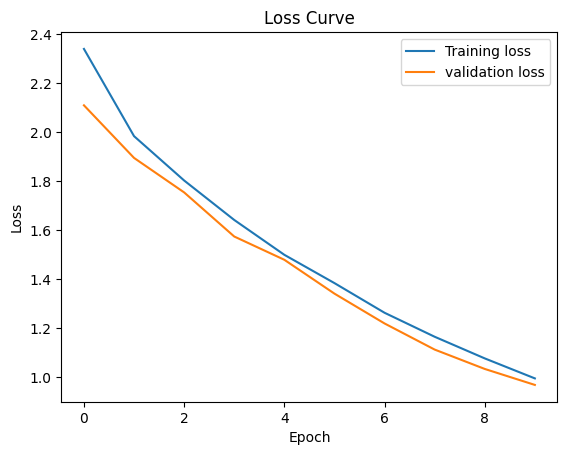

In [55]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

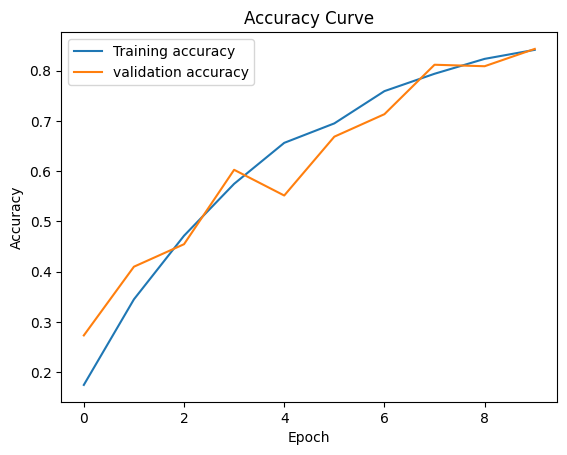

In [56]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

In [57]:
history=model.fit(X,y,epochs=10,batch_size=2000,validation_split=0.2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8508 - loss: 0.9492 - val_accuracy: 0.8278 - val_loss: 0.9450
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8394 - loss: 0.9234 - val_accuracy: 0.8022 - val_loss: 0.9176
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8395 - loss: 0.9010 - val_accuracy: 0.8342 - val_loss: 0.8773
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8471 - loss: 0.8591 - val_accuracy: 0.8642 - val_loss: 0.8203
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8667 - loss: 0.8129 - val_accuracy: 0.8720 - val_loss: 0.7784
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8654 - loss: 0.7922 - val_accuracy: 0.8711 - val_loss: 0.7781
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8669 - loss: 0.7740 - val_accuracy: 0.8686 - val_loss: 0.7473
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8715 - loss: 0.7347 - val_accuracy: 0.8839 - val_loss: 0.7042


Text(0.5, 1.0, 'Loss Curve')

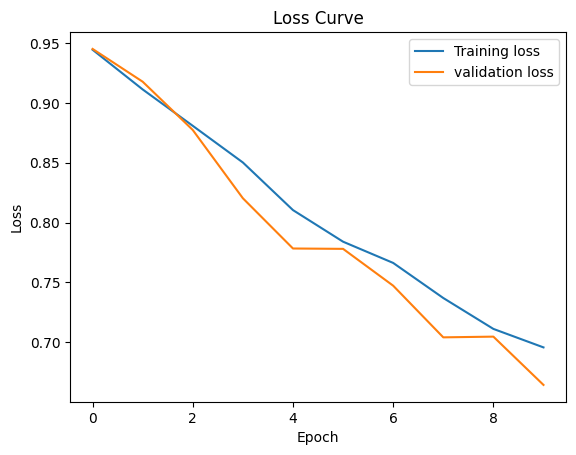

In [58]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

Text(0.5, 1.0, 'Accuracy Curve')

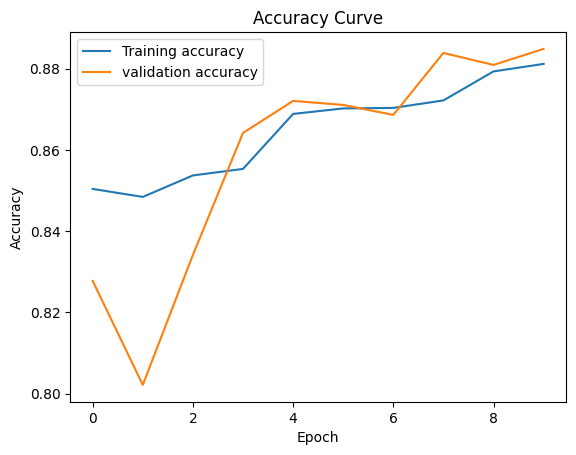

In [59]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')